#📌 Extracción

In [201]:
import pandas as pd

In [202]:
datos = pd.read_json('/content/TelecomX_Data.json')
datos.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [203]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#🔧 Transformación

In [204]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [205]:
datos.dtypes

,0
customerID,object
Churn,object
customer,object
phone,object
internet,object
account,object


In [206]:
datos.isnull()

,customerID,Churn,customer,phone,internet,account
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
7262,False,False,False,False,False,False
7263,False,False,False,False,False,False
7264,False,False,False,False,False,False
7265,False,False,False,False,False,False


In [207]:
#Las columnas mas relevantes son: customer, phone, internet y account, y claro "churn". Todas éstas excepto la última hay que investigarlas un poco mas para terminar de entenderlas bien.

In [208]:
#Ahora comenzaremos a ver las columnas y como podemos mejorar su visualización:

In [209]:
datos.customer.head()

,customer
0,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part..."
1,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne..."
2,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne..."
3,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne..."
4,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part..."


In [210]:
datos.phone.head()

,phone
0,"{'PhoneService': 'Yes', 'MultipleLines': 'No'}"
1,"{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}"
2,"{'PhoneService': 'Yes', 'MultipleLines': 'No'}"
3,"{'PhoneService': 'Yes', 'MultipleLines': 'No'}"
4,"{'PhoneService': 'Yes', 'MultipleLines': 'No'}"


In [211]:
datos.internet.head()

,internet
0,"{'InternetService': 'DSL', 'OnlineSecurity': '..."
1,"{'InternetService': 'DSL', 'OnlineSecurity': '..."
2,"{'InternetService': 'Fiber optic', 'OnlineSecu..."
3,"{'InternetService': 'Fiber optic', 'OnlineSecu..."
4,"{'InternetService': 'Fiber optic', 'OnlineSecu..."


In [212]:
datos.account.head()

,account
0,"{'Contract': 'One year', 'PaperlessBilling': '..."
1,"{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,"{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,"{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,"{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [213]:
#Tenemos que normalizar estas columnas, por lo tanto:

In [214]:
datos.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [215]:
columnas = ['customer','phone','internet','account']

In [216]:
for columna in columnas:
  datos = datos.join(pd.json_normalize(datos.pop(columna)))

In [217]:
#Obtenemos el DataFrame datos, ahora completo:

datos.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [218]:
#Para poder ver bien todas las columnas de mi DataFrame, hago:

pd.set_option('display.max_columns', None)
datos.tail()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65
7266,9995-HOTOH,No,Male,0,Yes,Yes,63,No,No phone service,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Electronic check,59.00,3707.6


In [219]:
import numpy as np

In [220]:
#Ahora lo que haremos será ver si hay datos vacios en el DataFrame
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [221]:
#Me fijo si tengo objetos nulos en Charges.Total, porque deberia ser float64 y es de tipo object

In [222]:
datos['Charges.Total'].eq(' ').sum()

np.int64(11)

In [223]:
#Vemos que en 'Charges.Total' hay 11 objetos nulos, por lo que reemplazamos ' ' por 0, para poder darles un valor que no sea un string vacío (cero)

datos['Charges.Total'] = datos['Charges.Total'].replace(' ',0)

In [224]:
#Ahora si podemos convertir el tipo de 'Charges.Total' a entero:

datos['Charges.Total'] = datos['Charges.Total'].astype(np.float64)

In [225]:
#Ahora tenemos que 'Charges.Total' es del tipo correcto:

datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [226]:
datos.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


In [227]:
#Ahora crearemos la columna 'Cuentas_Diarias'

datos['Cuentas_Diarias'] = datos['Charges.Monthly']/30

In [228]:
datos.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


In [229]:
#Estandarización y transformación de datos: en esta instancia cambiamos solo los tipos de las columnas que tienen opciones 'Yes' y 'No'. Las demás
#las dejamos igual. Más tarde veremos si es necesario cambiarles el tipo o no.

datos['Churn'] = (datos['Churn'] == "Yes").astype(np.int64)
datos['Partner'] = (datos['Partner'] == "Yes").astype(np.int64)
datos['Dependents'] = (datos['Dependents'] == "Yes").astype(np.int64)
datos['PhoneService'] = (datos['PhoneService'] == "Yes").astype(np.int64)
datos['OnlineSecurity'] = (datos['OnlineSecurity'] == "Yes").astype(np.int64)
datos['OnlineBackup'] = (datos['OnlineBackup'] == "Yes").astype(np.int64)
datos['DeviceProtection'] = (datos['DeviceProtection'] == "Yes").astype(np.int64)
datos['TechSupport'] = (datos['TechSupport'] == "Yes").astype(np.int64)
datos['StreamingMovies'] = (datos['StreamingMovies'] == "Yes").astype(np.int64)
datos['PaperlessBilling'] = (datos['PaperlessBilling'] == "Yes").astype(np.int64)
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   int64  
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   int64  
 5   Dependents        7267 non-null   int64  
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   int64  
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   int64  
 11  OnlineBackup      7267 non-null   int64  
 12  DeviceProtection  7267 non-null   int64  
 13  TechSupport       7267 non-null   int64  
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   int64  
 16  Contract          7267 non-null   object 


In [230]:
datos.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,No,DSL,0,1,0,1,Yes,0,One year,1,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,1,Yes,DSL,0,0,0,0,No,1,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1,Male,0,0,0,4,1,No,Fiber optic,0,0,1,0,No,0,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1,Male,1,1,0,13,1,No,Fiber optic,0,1,1,0,Yes,1,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1,Female,1,1,0,3,1,No,Fiber optic,0,0,0,1,Yes,0,Month-to-month,1,Mailed check,83.9,267.40,2.796667


#📊 Carga y análisis

In [231]:
#Análisis Descriptivo: obtenemos datos como la varianza, el mínimo, máximo, etc.

datos.describe()

,Churn,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingMovies,PaperlessBilling,Charges.Monthly,Charges.Total,Cuentas_Diarias
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.257190,0.162653,0.484106,0.300124,32.346498,0.902711,0.285950,0.344571,0.342782,0.289528,0.387505,0.593230,64.720098,2277.182035,2.157337
std,0.437115,0.369074,0.499782,0.458343,24.571773,0.296371,0.451897,0.475261,0.474672,0.453575,0.487214,0.491265,30.129572,2268.648587,1.004319
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.425000,396.200000,1.180833
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.300000,1389.200000,2.343333
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.875000,3778.525000,2.995833
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,3.958333


In [232]:
import matplotlib.pyplot as plt

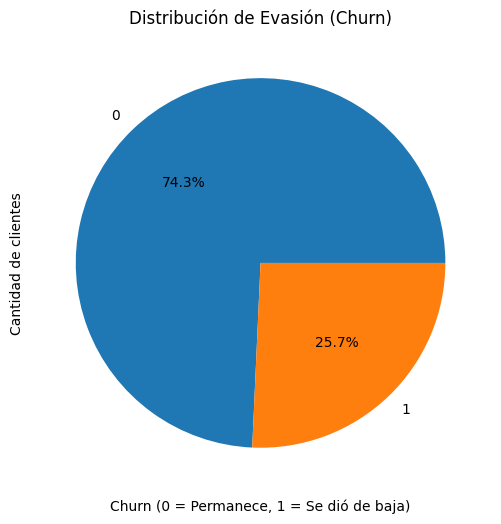

In [233]:
#Distribucion de evasión. Con un gráfico de torta es mas fácil visualizar la proporción de clientes que se dieron de baja y los que no.

datos['Churn'].value_counts(normalize=True).plot(kind='pie',figsize=(8,6),autopct='%1.1f%%')
plt.title('Distribución de Evasión (Churn)')
plt.xlabel('Churn (0 = Permanece, 1 = Se dió de baja)')
plt.ylabel('Cantidad de clientes')
plt.show()

In [234]:
#Distribución de la evasión según variables categóricas como: género, tipo de contrato, método de pago, entre otras.

#Por género
evasion_genero = datos.groupby('gender')['Churn'].mean()

#Por tipo de contrato
evasion_contrato = datos.groupby('Contract')['Churn'].mean()

#Por método de pago
evasion_pago = datos.groupby('PaymentMethod')['Churn'].mean()

#Por si tiene Partner o no
evasion_partner = datos.groupby('Partner')['Churn'].mean()

#Por si es Senior Citizen o no
evasion_senior = datos.groupby('SeniorCitizen')['Churn'].mean()

#Por si tiene dependientes o no
evasion_dependents = datos.groupby('Dependents')['Churn'].mean()

#Por si tiene una suscripción de streaming de peliculas o no
evasion_movies = datos.groupby('StreamingMovies')['Churn'].mean()


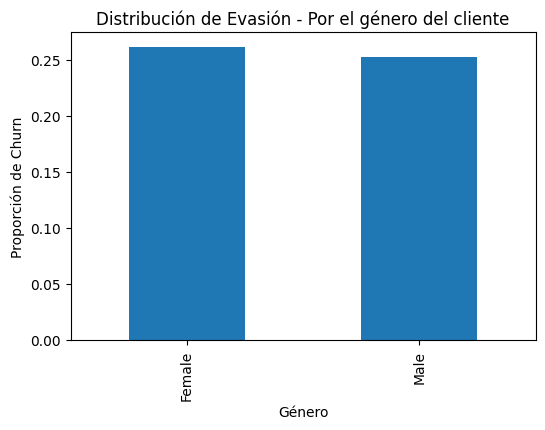

In [235]:
#Ahora hacemos un gráfico para cada distribución para ver mejor los resultados

evasion_genero.plot(kind='bar',figsize=(6,4))
plt.title('Distribución de Evasión - Por el género del cliente')
plt.ylabel('Proporción de Churn')
plt.xlabel('Género')
plt.show()

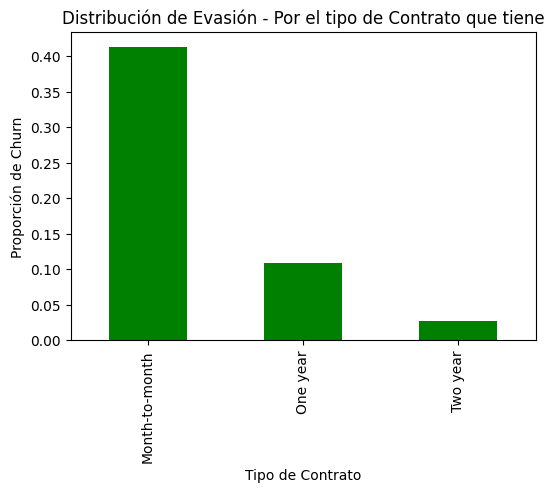

In [236]:
evasion_contrato.plot(kind='bar',figsize=(6,4), color='g')
plt.title('Distribución de Evasión - Por el tipo de Contrato que tiene')
plt.ylabel('Proporción de Churn')
plt.xlabel('Tipo de Contrato')
plt.show()

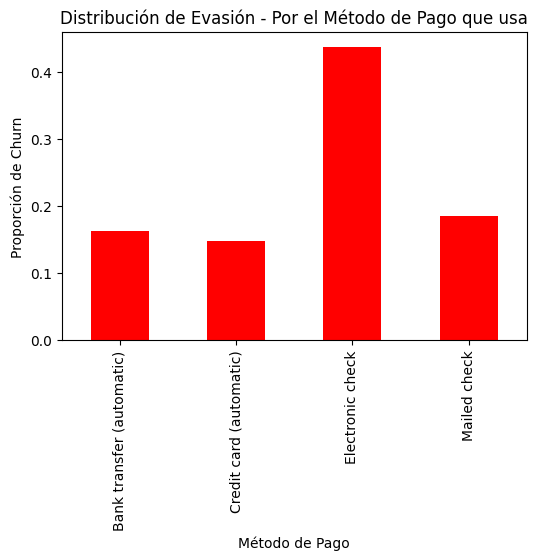

In [237]:
evasion_pago.plot(kind='bar',figsize=(6,4),color='r')
plt.title('Distribución de Evasión - Por el Método de Pago que usa')
plt.ylabel('Proporción de Churn')
plt.xlabel('Método de Pago')
plt.show()

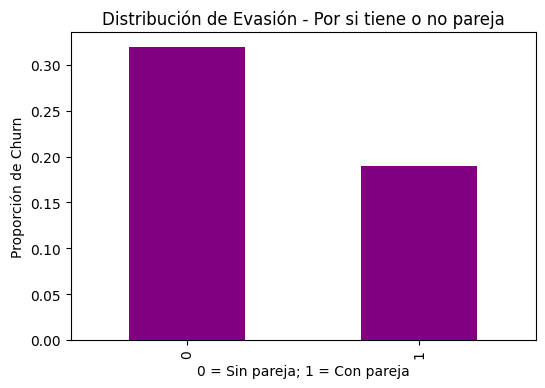

In [238]:
evasion_partner.plot(kind='bar',figsize=(6,4),color='purple')
plt.title('Distribución de Evasión - Por si tiene o no pareja')
plt.ylabel('Proporción de Churn')
plt.xlabel('0 = Sin pareja; 1 = Con pareja')
plt.show()

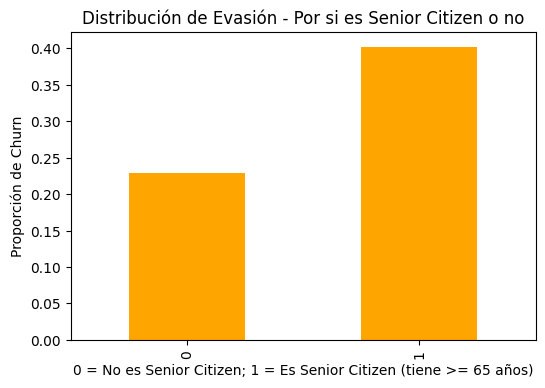

In [239]:
evasion_senior.plot(kind='bar',figsize=(6,4),color='orange')
plt.title('Distribución de Evasión - Por si es Senior Citizen o no')
plt.ylabel('Proporción de Churn')
plt.xlabel('0 = No es Senior Citizen; 1 = Es Senior Citizen (tiene >= 65 años)')
plt.show()

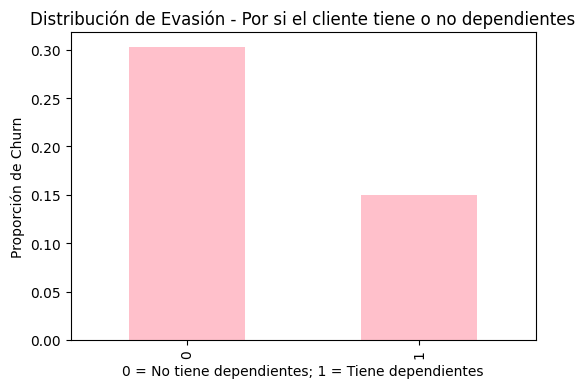

In [240]:
evasion_dependents.plot(kind='bar',figsize=(6,4),color='pink')
plt.title('Distribución de Evasión - Por si el cliente tiene o no dependientes')
plt.ylabel('Proporción de Churn')
plt.xlabel('0 = No tiene dependientes; 1 = Tiene dependientes')
plt.show()

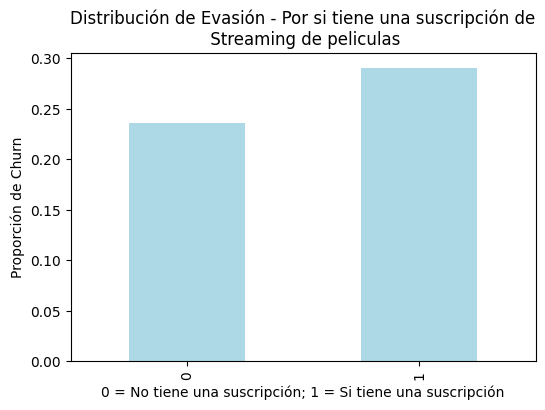

In [241]:
evasion_movies.plot(kind='bar',figsize=(6,4),color='lightblue')
plt.title('Distribución de Evasión - Por si tiene una suscripción de\n Streaming de peliculas')
plt.ylabel('Proporción de Churn')
plt.xlabel('0 = No tiene una suscripción; 1 = Si tiene una suscripción')
plt.show()

In [242]:
#Conteo de evasión por variables numéricas como: "total gastado" o "tiempo de contrato" y viendo como se distribuyen entre los clientes que cancelaron (evasión) y los que no cancelaron.

datos.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,No,DSL,0,1,0,1,Yes,0,One year,1,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,1,Yes,DSL,0,0,0,0,No,1,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1,Male,0,0,0,4,1,No,Fiber optic,0,0,1,0,No,0,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1,Male,1,1,0,13,1,No,Fiber optic,0,1,1,0,Yes,1,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1,Female,1,1,0,3,1,No,Fiber optic,0,0,0,1,Yes,0,Month-to-month,1,Mailed check,83.9,267.40,2.796667


In [243]:
#Con total gastado
evasion_total = datos.groupby('Churn')['Charges.Total'].mean()

#Con tiempo de contrato
evasion_tiempo_contrato = datos.groupby('Churn')['tenure'].mean()

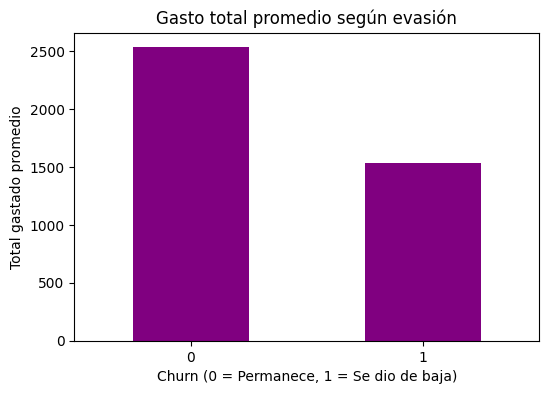

In [244]:
plt.figure(figsize=(6,4))

evasion_total.plot(kind='bar', color = 'purple')

plt.title('Gasto total promedio según evasión')
plt.xlabel('Churn (0 = Permanece, 1 = Se dio de baja)')
plt.ylabel('Total gastado promedio')
plt.xticks(rotation=0)
plt.show()

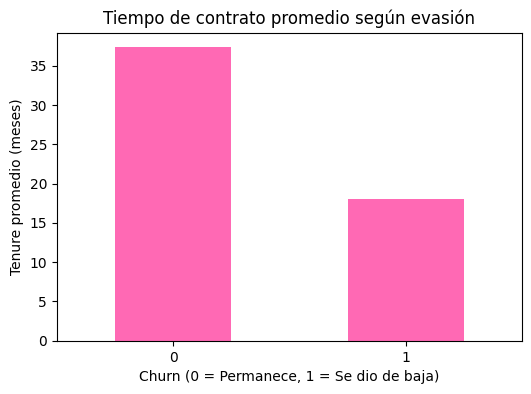

In [245]:
plt.figure(figsize=(6,4))

evasion_tiempo_contrato.plot(kind='bar', color='hotpink')

plt.title('Tiempo de contrato promedio según evasión')
plt.xlabel('Churn (0 = Permanece, 1 = Se dio de baja)')
plt.ylabel('Tenure promedio (meses)')
plt.xticks(rotation=0)
plt.show()

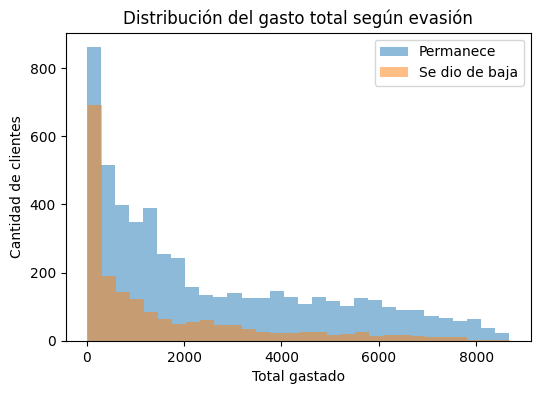

In [246]:
#Podriamos también hacer un histograma comparativo

plt.figure(figsize=(6,4))

plt.hist(datos[datos['Churn']==0]['Charges.Total'],
         bins=30,
         alpha=0.5,
         label='Permanece')

plt.hist(datos[datos['Churn']==1]['Charges.Total'],
         bins=30,
         alpha=0.5,
         label='Se dio de baja')

plt.title('Distribución del gasto total según evasión')
plt.xlabel('Total gastado')
plt.ylabel('Cantidad de clientes')
plt.legend()
plt.show()

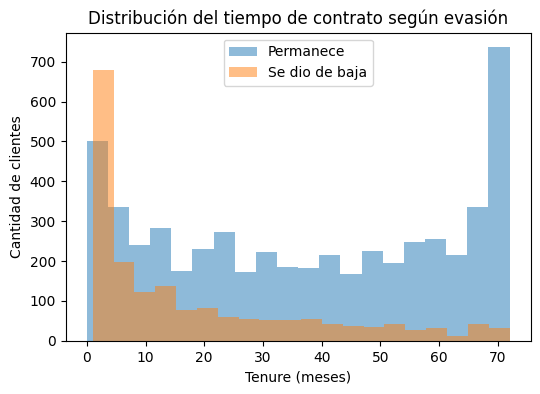

In [247]:
plt.figure(figsize=(6,4))

plt.hist(datos[datos['Churn']==0]['tenure'],
         bins=20,
         alpha=0.5,
         label='Permanece')

plt.hist(datos[datos['Churn']==1]['tenure'],
         bins=20,
         alpha=0.5,
         label='Se dio de baja')

plt.title('Distribución del tiempo de contrato según evasión')
plt.xlabel('Tenure (meses)')
plt.ylabel('Cantidad de clientes')
plt.legend()
plt.show()

In [248]:
datos.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,No,DSL,0,1,0,1,Yes,0,One year,1,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,1,Yes,DSL,0,0,0,0,No,1,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1,Male,0,0,0,4,1,No,Fiber optic,0,0,1,0,No,0,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1,Male,1,1,0,13,1,No,Fiber optic,0,1,1,0,Yes,1,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1,Female,1,1,0,3,1,No,Fiber optic,0,0,0,1,Yes,0,Month-to-month,1,Mailed check,83.9,267.40,2.796667


In [249]:
#Análisis de correlación entre variables: relación entre la cuenta diaria y la evasión.

#Usamos el método corr() que dice que:
    #1: correlación positiva perfecta
    #-1: correlación negativa perfecta
    #0: sin correlación

subdatos = datos.loc[:,['Churn','Cuentas_Diarias']]
subdatos.corr()

#No hay relación fuerte entre la evasión y la cuenta diaria

,Churn,Cuentas_Diarias
Churn,1.000000,0.189866
Cuentas_Diarias,0.189866,1.000000


In [250]:
#Cambiamos el tipo de StreamingTV -> Si hacemos datos.info() podemos ver que son de tipo Object, y yo quiero que sean enteros, para poder sumar la cantidad de
#servicios que posee el clientes.

datos['StreamingTV'] = datos['StreamingTV'].map({'No internet service': 0, 'No': 0, 'Yes': 1})

#Tambien hacemos lo mismo con MultipleLines
datos['MultipleLines'] = datos['MultipleLines'].map({'No phone service': 0, 'No': 0, 'Yes': 1})

#Al igual que con InternetService
datos['InternetService'] = datos['InternetService'].map({'No': 0, 'DSL': 1, 'Fiber optic': 1})

In [251]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   int64  
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   int64  
 5   Dependents        7267 non-null   int64  
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   int64  
 8   MultipleLines     7267 non-null   int64  
 9   InternetService   7267 non-null   int64  
 10  OnlineSecurity    7267 non-null   int64  
 11  OnlineBackup      7267 non-null   int64  
 12  DeviceProtection  7267 non-null   int64  
 13  TechSupport       7267 non-null   int64  
 14  StreamingTV       7267 non-null   int64  
 15  StreamingMovies   7267 non-null   int64  
 16  Contract          7267 non-null   object 


In [252]:
#Ahora queremos ver cómo la cantidad de servicios contratados afecta la probabilidad de churn.
#Creamos la columna servicios para saber cuántos servicios posee el cliente.

datos['Servicios'] = datos['PhoneService'] + datos['MultipleLines'] + datos['InternetService'] + datos['OnlineSecurity'] + datos['OnlineBackup'] + datos['DeviceProtection'] + datos['TechSupport'] + datos['StreamingTV'] + datos['StreamingMovies']

In [253]:
datos.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias,Servicios
0,0002-ORFBO,0,Female,0,1,1,9,1,0,1,0,1,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.186667,5
1,0003-MKNFE,0,Male,0,0,0,9,1,1,1,0,0,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,1.996667,4
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,1,0,0,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.463333,3
3,0011-IGKFF,1,Male,1,1,0,13,1,0,1,0,1,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.266667,6
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,1,0,0,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.796667,4


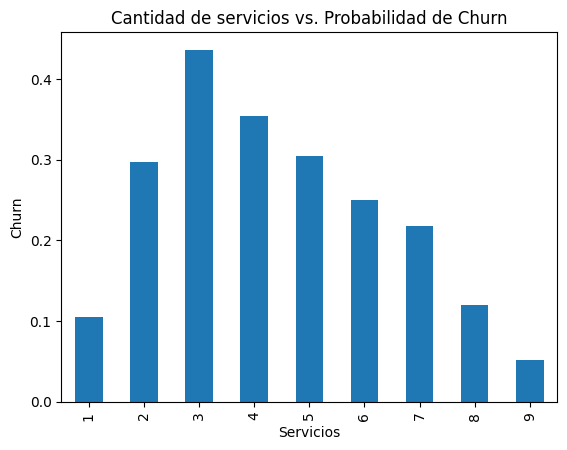

In [254]:
#Analisis de si la cantidad de servicios contratados afecta la probabilidad de churn.

datos.groupby('Servicios')['Churn'].mean().plot(kind='bar');
plt.ylabel('Churn');
plt.xlabel('Servicios');
plt.title('Cantidad de servicios vs. Probabilidad de Churn');

In [255]:
#La cantidad de servicios sí afecta muchísimo la probabilidad de churn, pero no de forma constante.
#Tener pocos servicios es seguro, tener muchos servicios es muy seguro, pero estar en el medio (2 a 4 servicios) es altamente riesgoso.

# 📄 Informe Final: Análisis de Evasión de Clientes (Churn) en TelecomX LATAM

## 🔹 Introducción
El presente informe detalla el análisis realizado sobre la base de datos de clientes de la empresa de telecomunicaciones TelecomX LATAM. El objetivo principal de este estudio es comprender y mitigar el **Churn** (la tasa de cancelación o evasión de clientes). En la industria de las telecomunicaciones, retener a un cliente existente es significativamente más rentable que adquirir uno nuevo. Por lo tanto, identificar qué perfiles son más propensos a darse de baja nos permite diseñar estrategias preventivas para mejorar la lealtad y los ingresos de la compañía.

---

## 🔹 Limpieza y Tratamiento de Datos
Para garantizar la calidad del análisis, los datos crudos en formato JSON fueron sometidos a un riguroso proceso de Extracción y Transformación (ETL):
1. **Normalización:** Se extrajo la información contenida en los diccionarios dentro de las columnas `customer`, `phone`, `internet` y `account`, expandiéndolas en variables independientes.
2. **Corrección de Tipos de Datos y Nulos:** Se detectaron valores en blanco (`' '`) en la columna `Charges.Total` (correspondientes a clientes nuevos con `tenure = 0`). Estos fueron reemplazados con `0` y la columna fue convertida a formato numérico flotante.
3. **Estandarización:** Variables categóricas afirmativas/negativas (ej. `PhoneService`, `OnlineSecurity`, `Dependents`, etc.) fueron mapeadas a valores enteros (1 y 0) para facilitar el análisis matemático y la futura implementación de modelos predictivos.
4. **Otros** * Se creó la variable `Cuentas_Diarias` dividiendo el cargo mensual por 30.
   * Se creó la variable `Servicios`, sumando todos los servicios individuales contratados por el cliente.

---

## 🔹 Análisis Exploratorio de Datos (EDA)
Mediante la visualización de datos, exploramos el comportamiento de los clientes y su relación con la tasa de evasión:
* El gráfico de torta general reveló la proporción total de clientes perdidos versus los retenidos, estableciendo nuestra línea base.
* El género demostró no ser un factor determinante. Sin embargo, ser *Senior Citizen* (adulto mayor) o no tener dependientes ni pareja aumenta visiblemente la proporción de Churn.
* Se observó una disparidad masiva en los tipos de contrato. Los clientes con contratos de mes a mes ("Month-to-month") tienen una tasa de cancelación alarmantemente alta en comparación con los contratos anuales o bianuales. Asimismo, el método de pago por "Electronic check" está fuertemente ligado a la baja del servicio.
* Los histogramas comparativos confirmaron que la gran mayoría de las cancelaciones ocurren en las primeras etapas de la relación con el cliente (bajos meses de *tenure* y bajo gasto total acumulado).
* El análisis de la nueva variable `Servicios` mostró un patrón no lineal muy interesante respecto a la probabilidad de Churn.

---

## 🔹 Conclusiones e Insights
A partir del análisis de los datos, he llegado a las siguientes conclusiones críticas para el negocio:

1. El mayor riesgo de perder a un cliente ocurre al inicio de su contrato. Si logramos que el cliente supere esta fase inicial, la probabilidad de que permanezca a largo plazo aumenta drásticamente.
2. La flexibilidad de los contratos "Month-to-month" es una espada de doble filo. Si bien atrae clientes, no genera ningún tipo de compromiso, facilitando la fuga rápida hacia la competencia.
3. Al analizar la cantidad de servicios contratados, descubrimos que tener muy pocos servicios es relativamente seguro, y tener el paquete completo (ecosistema total) es excelente para la retención. Sin embargo, **los clientes que tienen entre 2 y 4 servicios se encuentran en una zona altamente riesgosa**, mostrando los picos más altos de evasión.

---

## 🔹 Recomendaciones
Para reducir el Churn basándonos en los datos, se proponen las siguientes iniciativas:

* **Incentivar contratos a largo plazo:** Ofrecer descuentos agresivos o beneficios exclusivos (ej. un servicio de streaming de películas gratuito por 6 meses) a los clientes de "Month-to-month" que decidan pasarse a un contrato de 1 o 2 años.
* **Campaña de Onboarding y Fidelización Temprana:** Dado que la evasión ocurre temprano (bajo *tenure*), se debe implementar un programa de seguimiento y soporte técnico proactivo durante los primeros 3 a 6 meses del ciclo de vida del cliente.
* Para aquellos clientes que poseen entre 2 y 4 servicios, se deben crear promociones altamente atractivas para sumarles servicios adicionales (ej. Online Security, Tech Support, etc.). El objetivo es empujarlos hacia el segmento de 5+ servicios, donde la tasa de retención es mucho mayor.
* **Revisión de métodos de pago:** Desincentivar el uso de "Electronic Check" promocionando el débito automático o pagos por tarjeta de crédito recurrente.